## 1 Functions and module

### 1.1 Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import gridspec
import numpy as np
import seaborn as sns
%matplotlib inline 
import scipy
import itertools
import matplotlib as mpl

In [2]:
pd.set_option('display.max_columns', None)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
import warnings
warnings.simplefilter("ignore")  # Suppresses all warnings

In [4]:
pd.set_option('display.max_columns', None)

### 1.2 Functions

In [5]:
def customize_plot(ax, 
                   xaxis_title_size=12, 
                   xaxis_tick_label_size=10, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=10, 
                   panel_title='A', 
                   panel_title_size=14,
                   xaxis_title=None, 
                   yaxis_title=None):
    """
    Customize the plot by controlling the font size and text for x-axis, y-axis titles, tick labels, and panel title.
    
    Parameters:
    ax (matplotlib.axes.Axes): The axis to customize.
    xaxis_title_size (int): Font size for the x-axis title.
    xaxis_tick_label_size (int): Font size for the x-axis tick labels.
    yaxis_title_size (int): Font size for the y-axis title.
    yaxis_tick_label_size (int): Font size for the y-axis tick labels.
    panel_title (str): Text for the panel title.
    panel_title_size (int): Font size for the panel title.
    xaxis_title (str or None): Text for the x-axis title. If None, keep the existing title.
    yaxis_title (str or None): Text for the y-axis title. If None, keep the existing title.
    """
    
    # Set the x-axis title and font size
    if xaxis_title is not None:
        ax.set_xlabel(xaxis_title, fontsize=xaxis_title_size)
    else:
        ax.set_xlabel(ax.get_xlabel(), fontsize=xaxis_title_size)
    
    # Set the y-axis title and font size
    if yaxis_title is not None:
        ax.set_ylabel(yaxis_title, fontsize=yaxis_title_size)
    else:
        ax.set_ylabel(ax.get_ylabel(), fontsize=yaxis_title_size)
    
    # Set the x-axis tick label font size
    ax.tick_params(axis='x', labelsize=xaxis_tick_label_size)
    
    # Set the y-axis tick label font size
    ax.tick_params(axis='y', labelsize=yaxis_tick_label_size)
    
    # Set the panel title with custom text and font size
    ax.set_title(panel_title, loc='left', fontsize=panel_title_size)

In [6]:
def find_focal_gene_position(combination, focal_gene):
    if combination == f'{focal_gene}_Inert_Inert_Inert':
        return 'Position 1'
    elif combination == f'Inert_{focal_gene}_Inert_Inert':
        return 'Position 2'
    elif combination == f'Inert_Inert_{focal_gene}_Inert':
        return 'Position 3'
    elif combination == f'Inert_Inert_Inert_{focal_gene}':
        return 'Position 4'
    else:
        return 'Not Found'

## 2 Input and output address

In [7]:
data_dir = 'data/'
# don't consider position 
data_df_address1 = data_dir+'EfficiencyTable_for_gene_level_tumor_metrics_ignore_position.csv'
# consider position 
data_df_address2 = data_dir+'EfficiencyTable_for_gene_level_tumor_metrics_consider_position.csv'
data_df_address3 = data_dir+'EfficiencyTable_for_NT_Safe_comparison.csv'

## 3 Data Input

### 3.1 None position data

In [8]:
data_df1 = pd.read_csv(data_df_address1)

In [9]:
data_df1_KTCas12a = data_df1[data_df1.Genotype=='KTCas12a']

In [10]:
data_df1_KT = data_df1[data_df1.Genotype=='KT']

In [11]:
data_df1.head()

,gene_combination_unordered,TTN,LN_mean_relative,LN_mean_relative_bootstrap_median,LN_mean_relative_bootstrap_mean,LN_mean_relative_97.5P,LN_mean_relative_2.5P,LN_mean_relative_pvalue_twoside,LN_mean_relative_pvalue_twoside_FDR,95_percentile_relative,95_percentile_relative_bootstrap_median,95_percentile_relative_bootstrap_mean,95_percentile_relative_97.5P,95_percentile_relative_2.5P,95_percentile_relative_pvalue_twoside,95_percentile_relative_pvalue_twoside_FDR,TTN_normalized_relative,TTN_normalized_relative_bootstrap_median,TTN_normalized_relative_bootstrap_mean,TTN_normalized_relative_97.5P,TTN_normalized_relative_2.5P,TTN_normalized_relative_pvalue_twoside,TTN_normalized_relative_pvalue_twoside_FDR,Genotype
0,Ccnl1_Ccnl1_Ccnl2_Ccnl2,225.0,0.671110,0.658322,0.672885,0.873137,0.538964,0.004,0.004762,0.598050,0.582759,0.606618,1.182610,0.324224,0.108,0.12000,0.371171,0.371609,0.379413,0.522327,0.271744,0.000,0.000000,KTCas12a
1,Ccnl1_Ccnl1_Ccnl2_Inert,922.0,0.645044,0.646626,0.648511,0.722474,0.588058,0.000,0.000000,0.451130,0.459028,0.472776,0.637222,0.377888,0.000,0.00000,0.696705,0.694422,0.698314,0.854005,0.551370,0.002,0.004348,KTCas12a
2,Ccnl1_Ccnl2_Ccnl2_Inert,586.0,0.592333,0.591746,0.593721,0.665230,0.536977,0.000,0.000000,0.469128,0.442971,0.448169,0.636403,0.330402,0.000,0.00000,0.508409,0.512970,0.519561,0.681464,0.391984,0.000,0.000000,KTCas12a
3,Ccnl1_Ccnl2_Inert_Inert,3677.0,0.659806,0.660682,0.660219,0.698256,0.621727,0.000,0.000000,0.565223,0.567517,0.567490,0.651322,0.479807,0.000,0.00000,0.465085,0.461784,0.465013,0.524873,0.419488,0.000,0.000000,KTCas12a
4,Ccnl1_Inert_Inert_Inert,3467.0,1.014513,1.012662,1.015082,1.109374,0.934671,0.752,0.767347,1.035823,1.021524,1.022654,1.147616,0.898488,0.734,0.74898,0.966839,0.965841,0.971872,1.134128,0.842072,0.650,0.855263,KTCas12a


### 3.2 Position data

In [12]:
data_df2 = pd.read_csv(data_df_address2)

In [13]:
data_df2_KTCas12a = data_df2[data_df2.Genotype=='KTCas12a']

In [14]:
data_df2_KT = data_df2[data_df2.Genotype=='KT']

### 3.3 NT vs Safe data

In [15]:
data_df3 = pd.read_csv(data_df_address3)

## 4 Plotting for synthetic lethal cases

### 4.1 Gsk3a/3b

#### KTCas12a 

<font size="10" color="red"> Fig. S7(e) and (f) </font>

In [16]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains('Gsk')].copy()

In [17]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = True
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[False]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

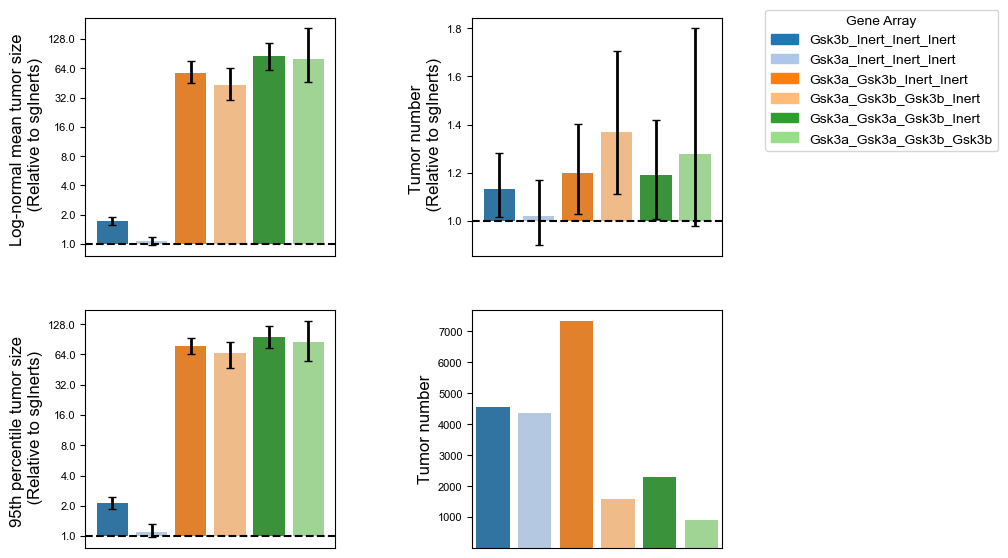

In [18]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Not included in the plots </font>

In [19]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains('Gsk')].copy()

In [20]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[False]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

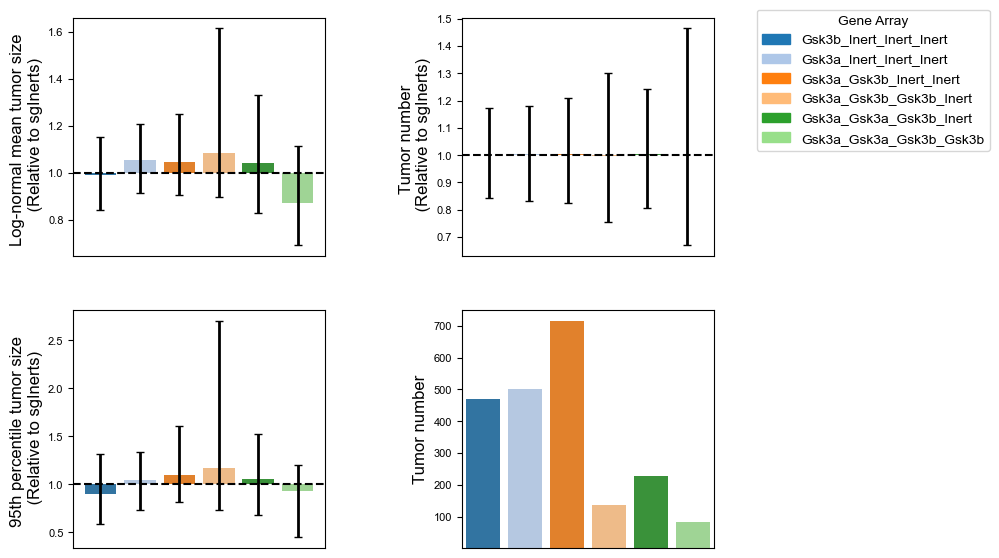

In [21]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

### 4.2 Ccnl1/2

#### KTCas12a 

<font size="10" color="red"> Fig. 6(e) and S7(a) </font>

In [22]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains('Ccnl')].copy()

In [23]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[False]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

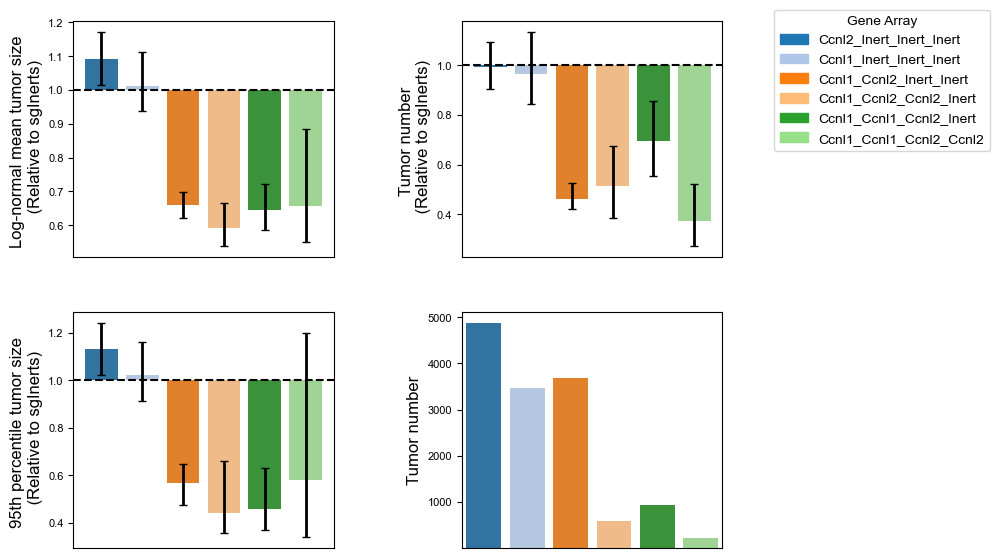

In [24]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Fig. S7(b) </font>

In [25]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains('Gsk')].copy()

In [26]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[False]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

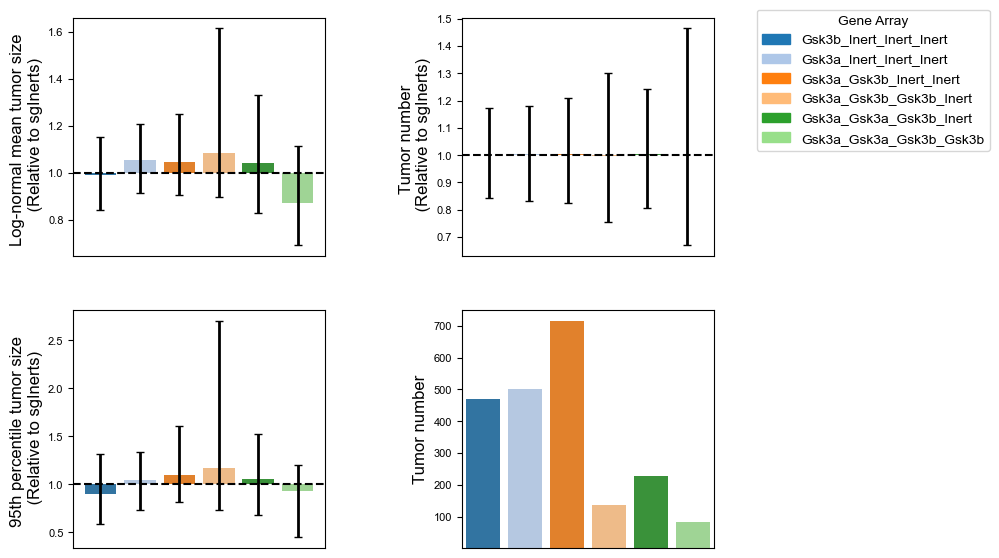

In [27]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

### 4.3 G3bp1/2

#### KTCas12a 

<font size="10" color="red"> Fig. S7(c) and (d) </font>

In [28]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains('G3bp')].copy()

In [29]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[False]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

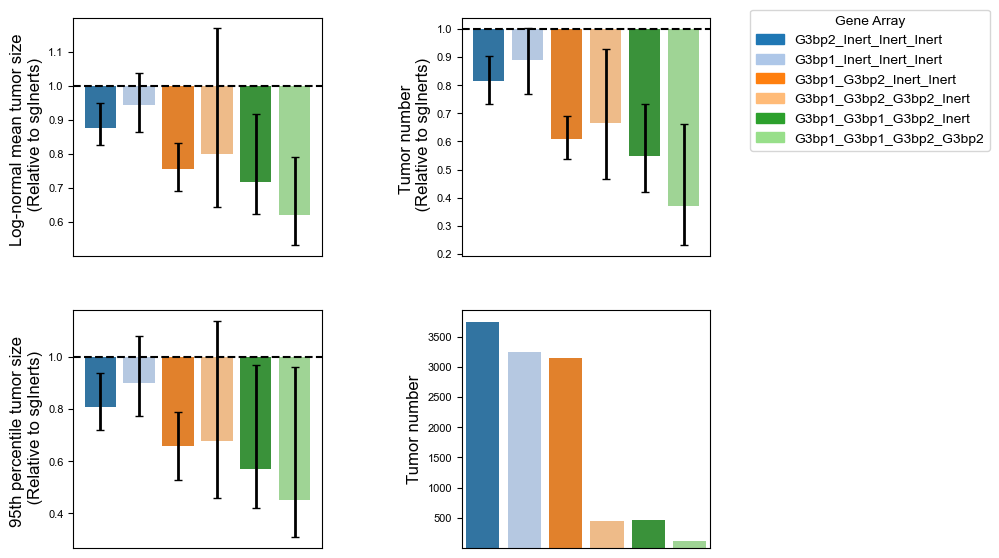

In [30]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Not included in the plots </font>

In [31]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains('Gsk')].copy()

In [32]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[False]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

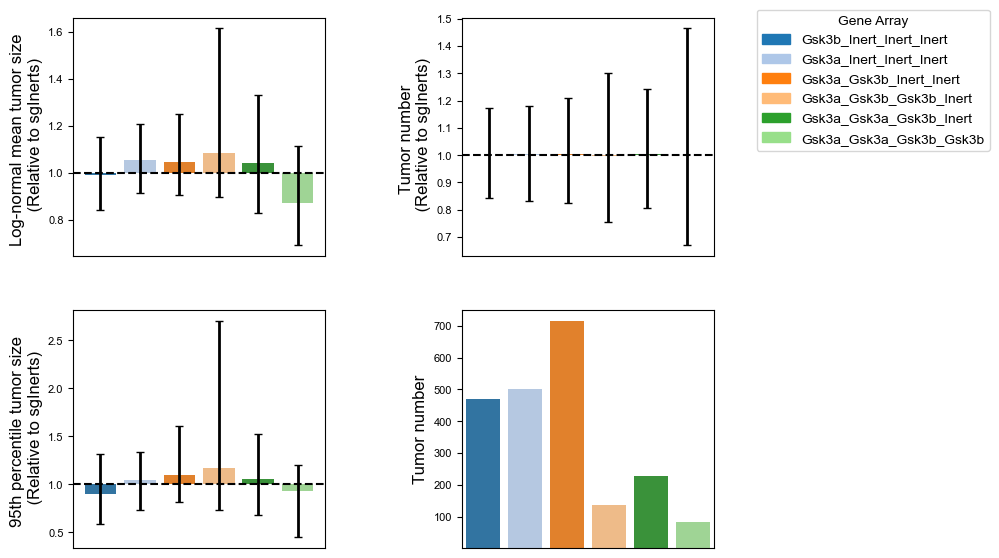

In [33]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

## 5 TSG guide number effect

### 5.1 Rb1

#### KTCas12a 

<font size="10" color="red"> Fig. 6(c) and (f) </font>

In [34]:
focal_genotype = 'Rb1'

In [35]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [36]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

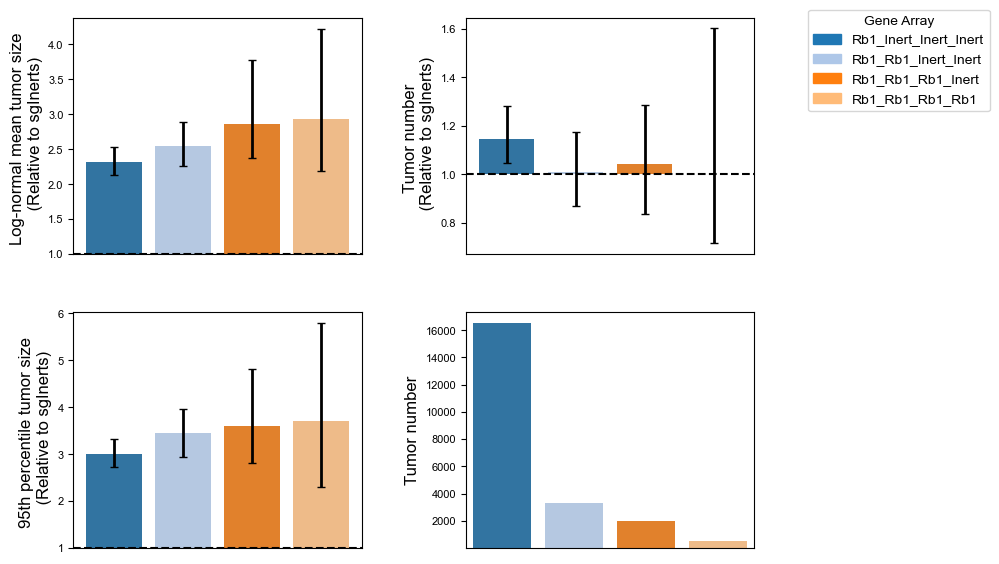

In [37]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Fig. S6(h)</font>

In [38]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [39]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

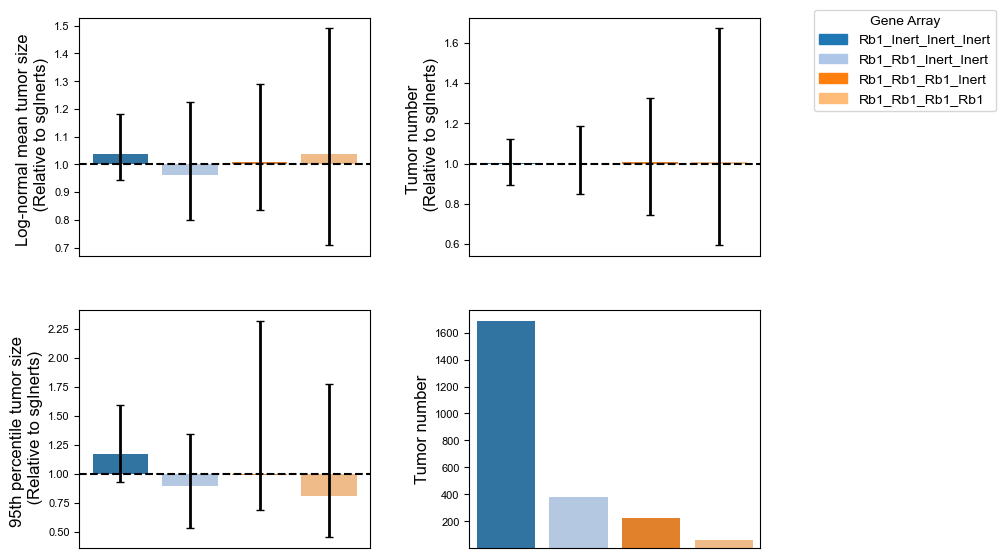

In [40]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

### 5.2 Rbm10

In [41]:
focal_genotype = 'Rbm10'

#### KTCas12a 

<font size="10" color="red"> Fig. S6(a) </font>

In [42]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [43]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

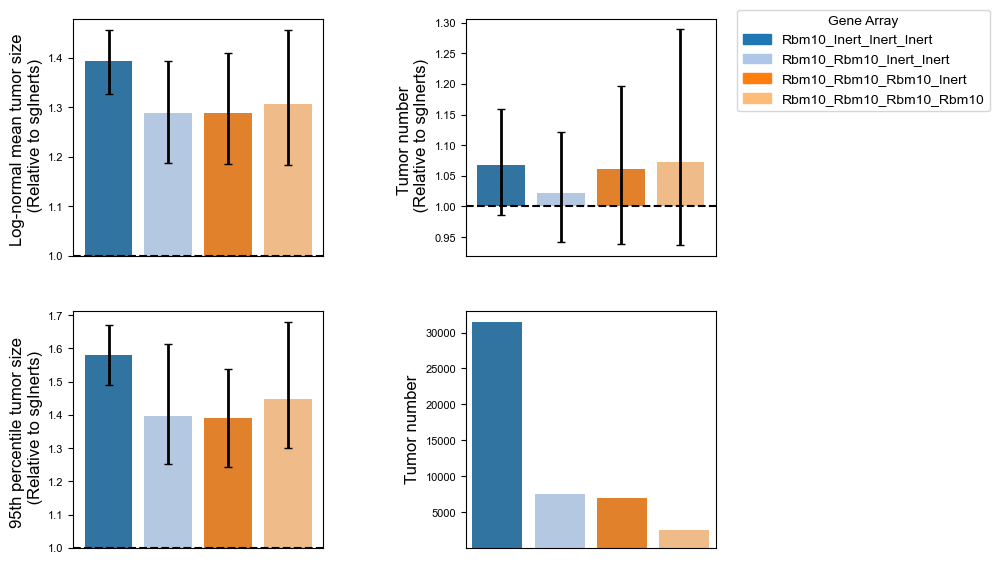

In [44]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Not included</font>

In [45]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [46]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

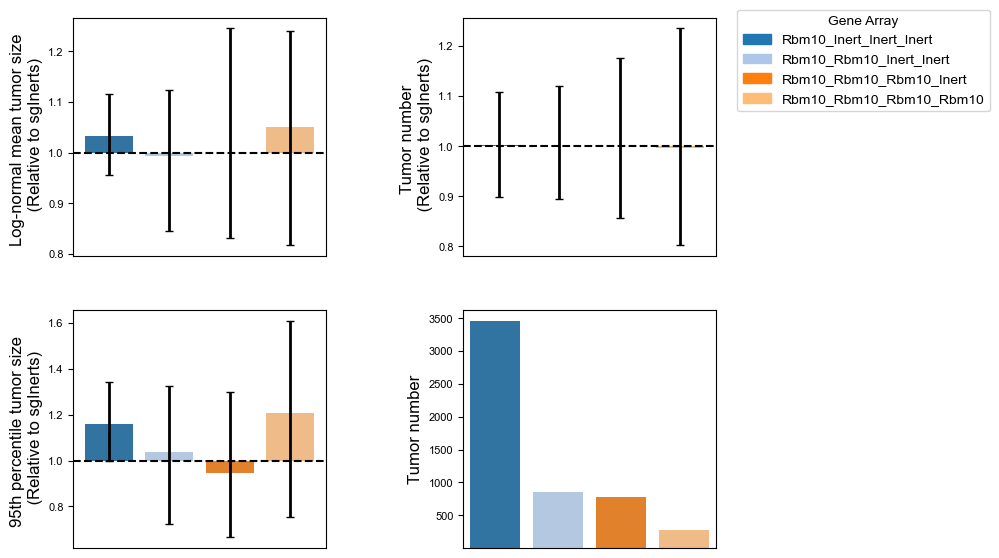

In [47]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

### 5.3 Setd2

In [48]:
focal_genotype = 'Setd2'

#### KTCas12a 

<font size="10" color="red"> Fig. S6(b) </font>

In [49]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [50]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

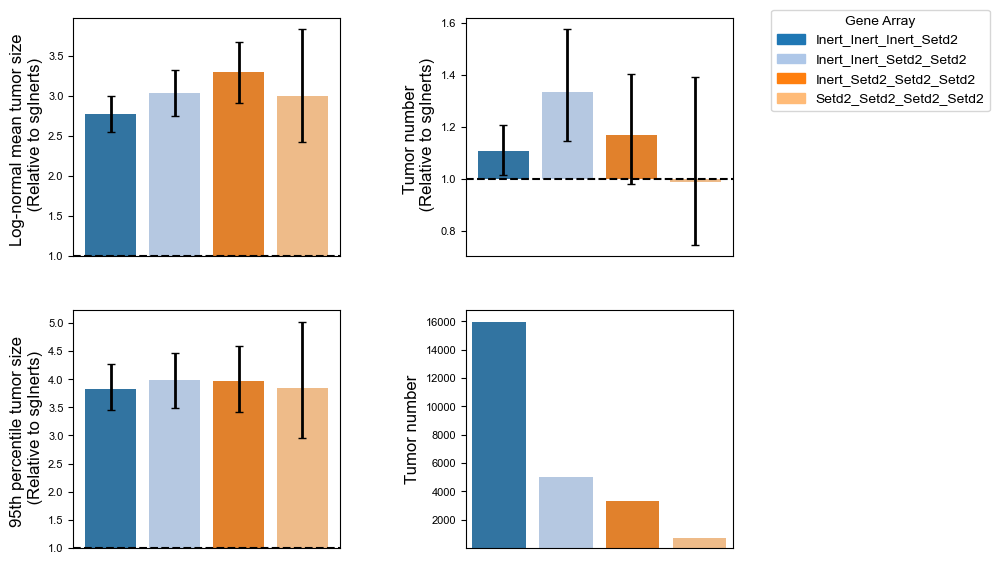

In [51]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Not included</font>

In [52]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [53]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

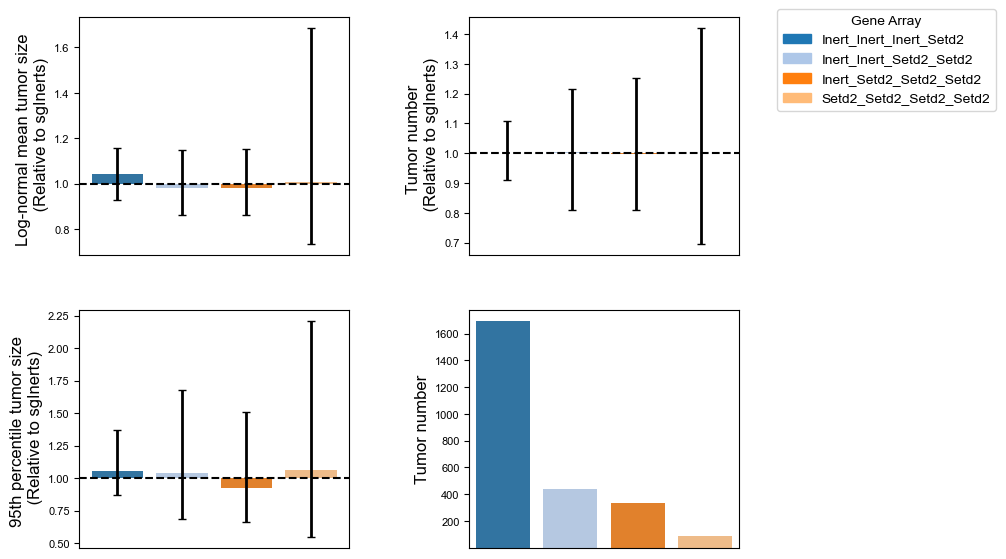

In [54]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

## 6 EG guide number effect¶

### 6.1 Rps9

#### KTCas12a 

<font size="10" color="red"> Fig. 6(d) and S6(e) </font>

In [55]:
focal_genotype = 'Rps9'

In [56]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [57]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

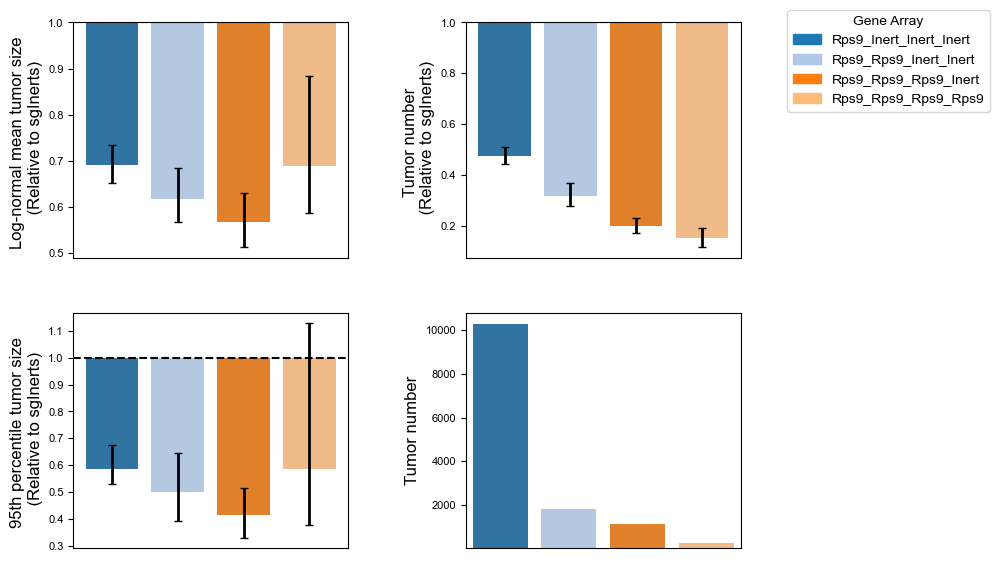

In [58]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Fig. S6(i)</font>

In [59]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [60]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

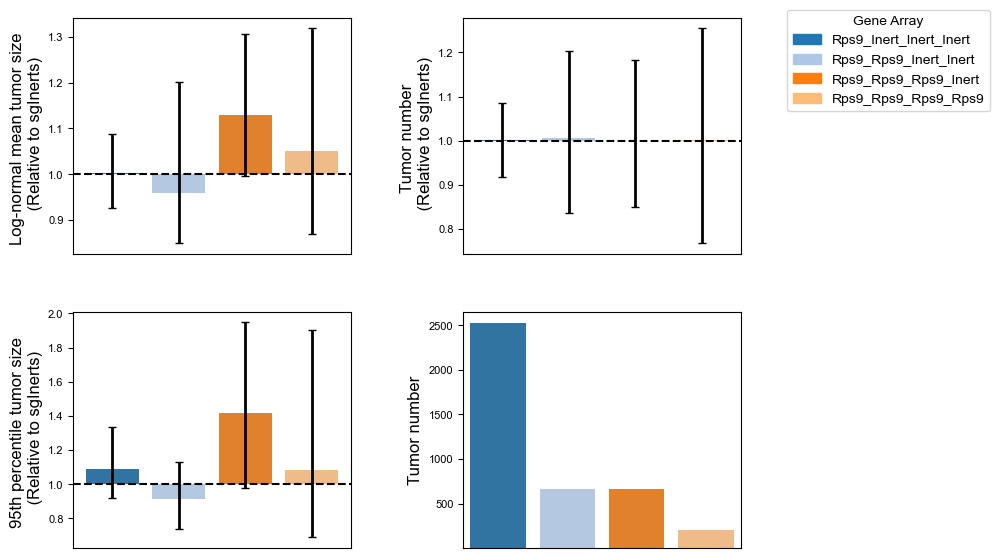

In [61]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

### 6.2 Pcna

#### KTCas12a 

<font size="10" color="red"> Fig. S6(c) and (f) </font>

In [62]:
focal_genotype = 'Pcna'

In [63]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [64]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

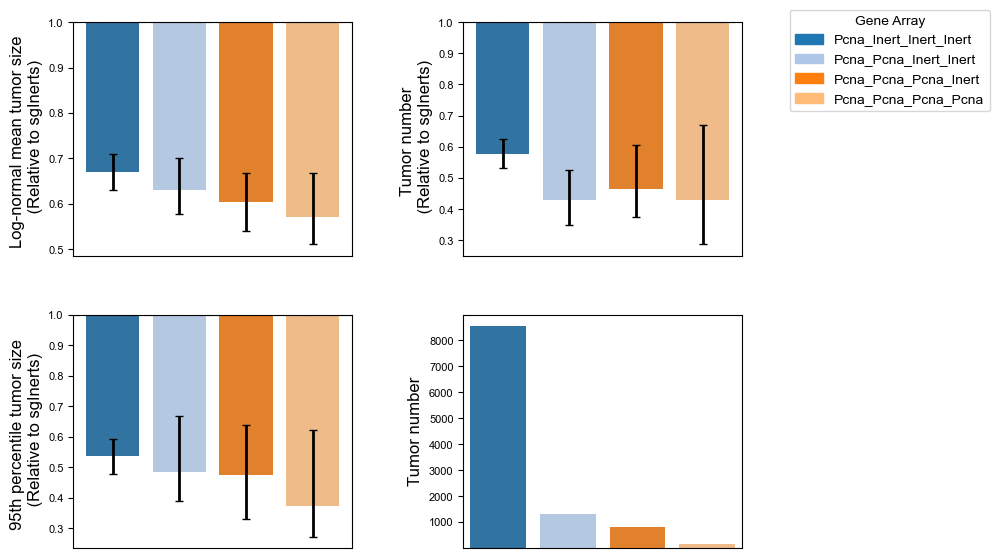

In [65]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Not included</font>

In [66]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [67]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

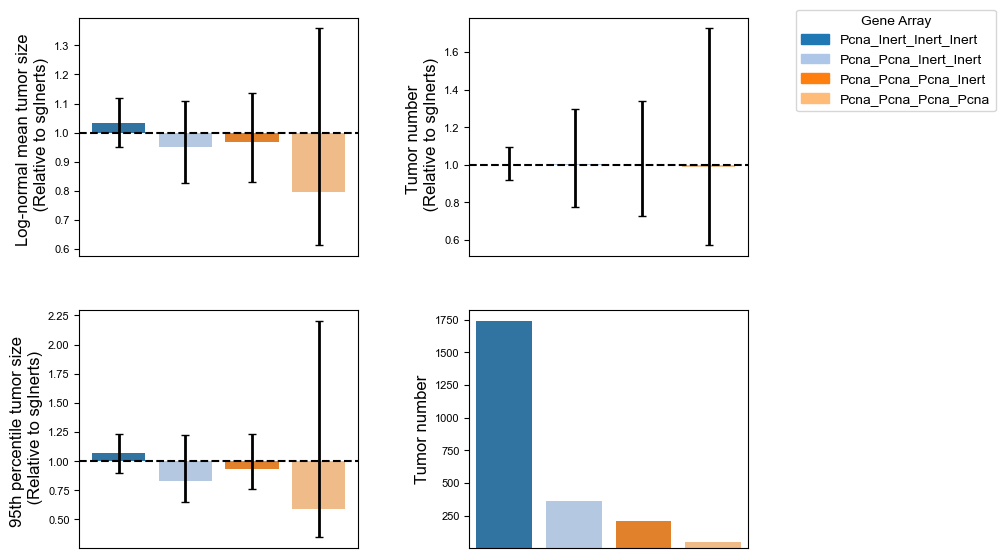

In [68]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

### 6.3 Rpa3

#### KTCas12a 

<font size="10" color="red"> Fig. S6(d) and (g) </font>

In [69]:
focal_genotype = 'Rpa3'

In [70]:
query_df = data_df1_KTCas12a[data_df1_KTCas12a.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [71]:
x_axis_p = 'gene_combination_unordered'
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0
test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

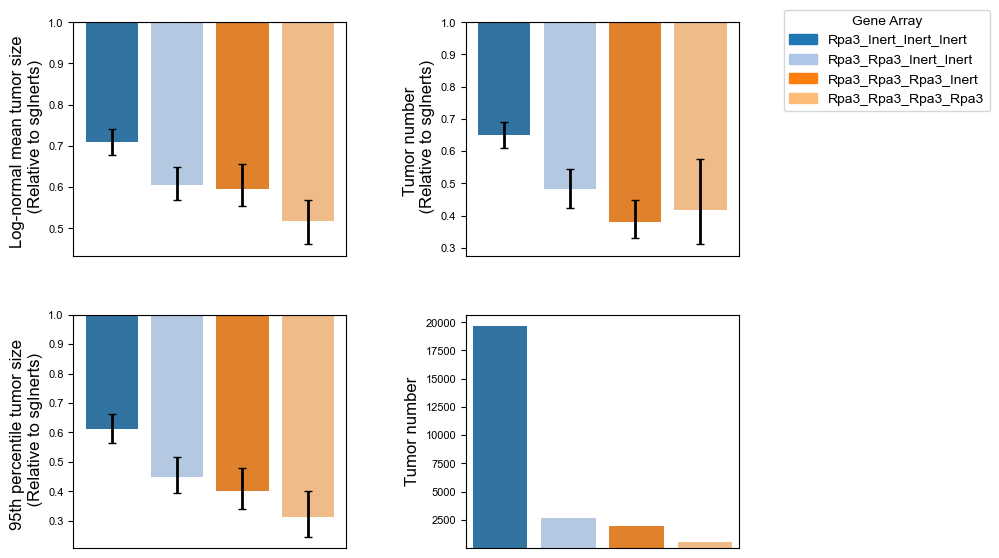

In [72]:
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


#### KT

<font size="10" color="red"> Not included</font>

In [73]:
query_df = data_df1_KT[data_df1_KT.gene_combination_unordered.str.contains(focal_genotype)].copy()

In [74]:
x_axis_p = 'gene_combination_unordered'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

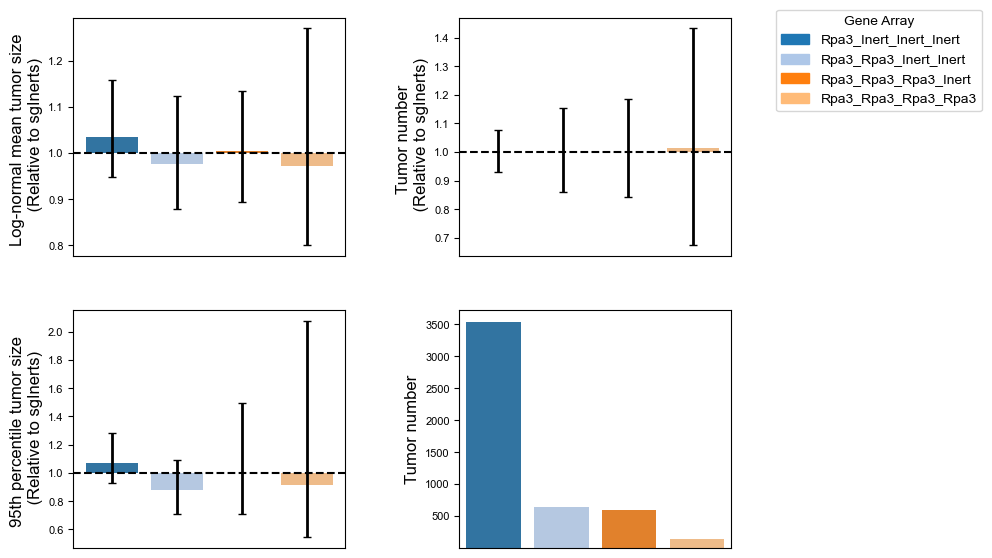

In [75]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()


-----

## 7 TSG guide position effect

#### KTCas12a

<font size="10" color="red"> Fig. 6(f) and S8(b-c) </font>

In [76]:
# Define custom colors for each position
custom_palette = {
    "Position 1": "#1f77b4",  # Blue
    "Position 2": "#d62728",  # Red
    "Position 3": "#ff7f0e",  # Orange
    "Position 4": "#2ca02c"   # Green
}

In [77]:
# input preparation
query_df = data_df2_KTCas12a.copy()
query_gene_list = ['Setd2','Rb1','Rbm10']
output_df = []

In [78]:
for focal_gene in query_gene_list:
    pa1 = f'{focal_gene}_Inert_Inert_Inert'
    pa2 = f'Inert_Inert_Inert_{focal_gene}'
    temp_df = query_df[query_df.gene_combination_unordered.isin([pa1,pa2])].copy()
    temp_df['focal_gene_position'] = temp_df['gene_combination'].apply(lambda x: find_focal_gene_position(x, focal_gene)) # find focal gene location
    temp_df['Focal_gene'] = focal_gene 
    output_df.append(temp_df)
output_df = pd.concat(output_df,ignore_index=True)

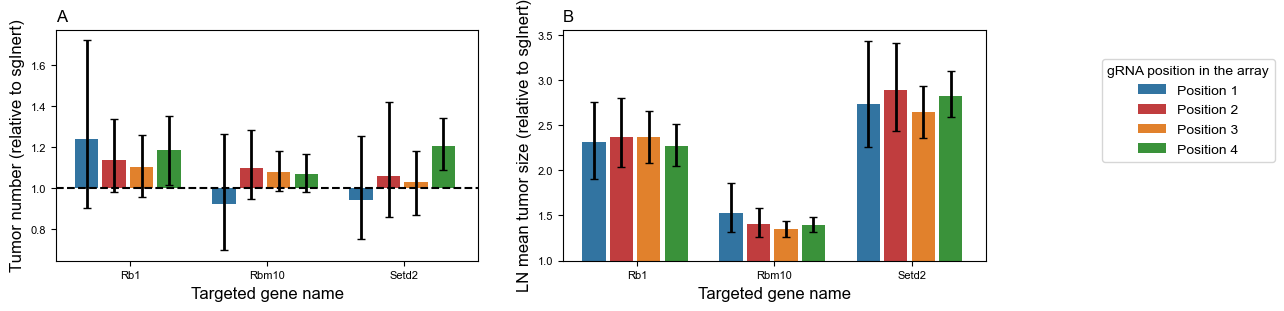

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configuration parameters
# Set figure size
# Panel 1 setup
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Flatten the 1x2 array of axes to easily iterate or assign
ax1, ax2 =  axes.ravel()

# Panel 1
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax1,
    ci=None,
    bottom=1,
    dodge=True,  # Ensures bars are grouped but spaced
    palette=custom_palette
)

# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax1.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Tumor number (relative to sgInert)')
ax1.set_xlabel('Targeted gene name')
ax1.legend(title='gRNA position in the array').set_visible(False)
customize_plot(ax1, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='A', 
                   panel_title_size=12,
                   xaxis_title=None)
# Panel 2
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax2,
    ci=None,
    bottom=1,
    palette=custom_palette
)
# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax2.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
# ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('LN mean tumor size (relative to sgInert)')
ax2.set_xlabel('Targeted gene name')
ax2.legend(title='gRNA position in the array',ncol=1, loc='center right', bbox_to_anchor=(1.7, 0.65))
customize_plot(ax2, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='B', 
                   panel_title_size=12,
                   xaxis_title=None)

# Show plot
plt.show()
# fig.savefig(temp_fig1)

#### KT

<font size="10" color="red"> Fig. S8(a) </font>

In [80]:
# Define custom colors for each position
custom_palette = {
    "Position 1": "#1f77b4",  # Blue
    "Position 2": "#d62728",  # Red
    "Position 3": "#ff7f0e",  # Orange
    "Position 4": "#2ca02c"   # Green
}

In [81]:
# input preparation
query_df = data_df2_KT.copy()
query_gene_list = ['Setd2','Rb1','Rbm10']
output_df = []

In [82]:
for focal_gene in query_gene_list:
    pa1 = f'{focal_gene}_Inert_Inert_Inert'
    pa2 = f'Inert_Inert_Inert_{focal_gene}'
    temp_df = query_df[query_df.gene_combination_unordered.isin([pa1,pa2])].copy()
    temp_df['focal_gene_position'] = temp_df['gene_combination'].apply(lambda x: find_focal_gene_position(x, focal_gene)) # find focal gene location
    temp_df['Focal_gene'] = focal_gene 
    output_df.append(temp_df)
output_df = pd.concat(output_df,ignore_index=True)

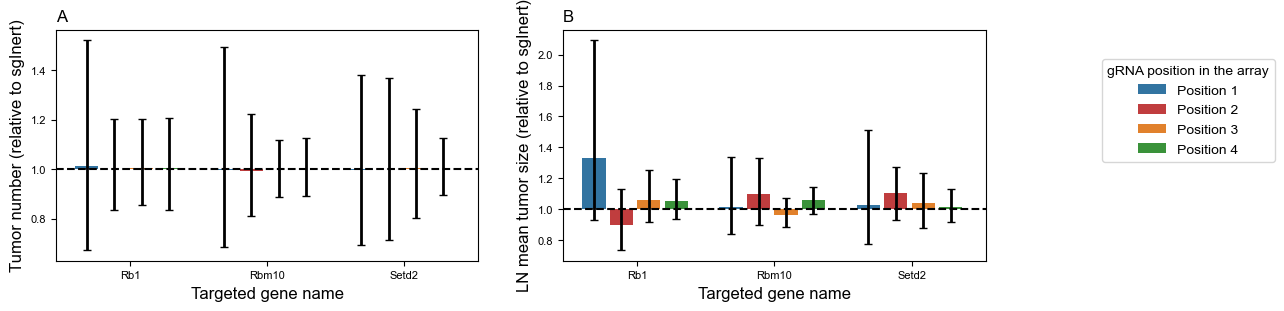

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configuration parameters
# Set figure size
# Panel 1 setup
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Flatten the 1x2 array of axes to easily iterate or assign
ax1, ax2 =  axes.ravel()

# Panel 1
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax1,
    ci=None,
    bottom=1,
    dodge=True,  # Ensures bars are grouped but spaced
    palette=custom_palette
)

# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax1.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Tumor number (relative to sgInert)')
ax1.set_xlabel('Targeted gene name')
ax1.legend(title='gRNA position in the array').set_visible(False)
customize_plot(ax1, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='A', 
                   panel_title_size=12,
                   xaxis_title=None)
# Panel 2
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax2,
    ci=None,
    bottom=1,
    palette=custom_palette
)
# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax2.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
# ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('LN mean tumor size (relative to sgInert)')
ax2.set_xlabel('Targeted gene name')
ax2.legend(title='gRNA position in the array',ncol=1, loc='center right', bbox_to_anchor=(1.7, 0.65))
customize_plot(ax2, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='B', 
                   panel_title_size=12,
                   xaxis_title=None)
ax2.axhline(y=1, color='black', linestyle='--')
# Show plot
plt.show()
# fig.savefig(temp_fig1)

----

## 8 G guide position effect

#### KTCas12a

<font size="10" color="red"> Fig. 6(g) and S8(d,f-i) </font>

In [84]:
# Define custom colors for each position
custom_palette = {
    "Position 1": "#1f77b4",  # Blue
    "Position 2": "#d62728",  # Red
    "Position 3": "#ff7f0e",  # Orange
    "Position 4": "#2ca02c"   # Green
}

In [85]:
# input preparation
query_df = data_df2_KTCas12a.copy()
query_gene_list = ['Rps9','Rpa3','Pcna']
output_df = []

In [86]:
for focal_gene in query_gene_list:
    pa1 = f'{focal_gene}_Inert_Inert_Inert'
    pa2 = f'Inert_Inert_Inert_{focal_gene}'
    temp_df = query_df[query_df.gene_combination_unordered.isin([pa1,pa2])].copy()
    temp_df['focal_gene_position'] = temp_df['gene_combination'].apply(lambda x: find_focal_gene_position(x, focal_gene)) # find focal gene location
    temp_df['Focal_gene'] = focal_gene 
    output_df.append(temp_df)
output_df = pd.concat(output_df,ignore_index=True)

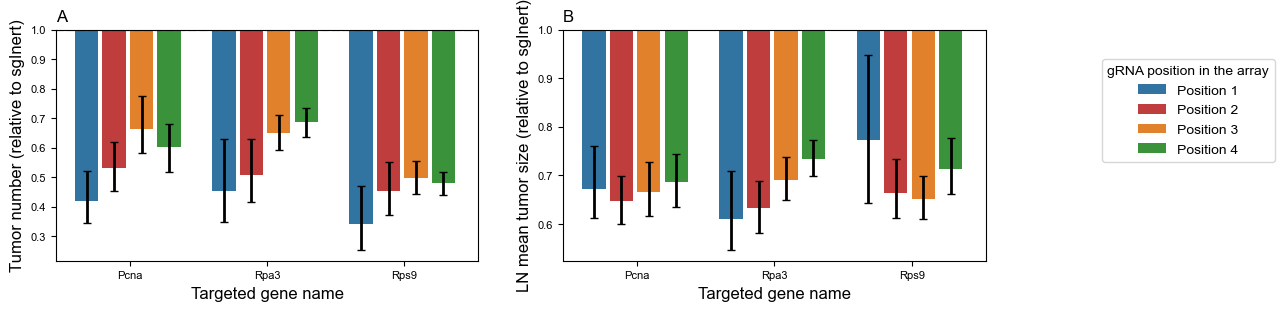

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configuration parameters
# Set figure size
# Panel 1 setup
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Flatten the 1x2 array of axes to easily iterate or assign
ax1, ax2 =  axes.ravel()

# Panel 1
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax1,
    ci=None,
    bottom=1,
    dodge=True,  # Ensures bars are grouped but spaced
    palette=custom_palette
)

# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax1.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Tumor number (relative to sgInert)')
ax1.set_xlabel('Targeted gene name')
ax1.legend(title='gRNA position in the array').set_visible(False)
customize_plot(ax1, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='A', 
                   panel_title_size=12,
                   xaxis_title=None)
# Panel 2
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax2,
    ci=None,
    bottom=1,
    palette=custom_palette
)
# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax2.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
# ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('LN mean tumor size (relative to sgInert)')
ax2.set_xlabel('Targeted gene name')
ax2.legend(title='gRNA position in the array',ncol=1, loc='center right', bbox_to_anchor=(1.7, 0.65))
customize_plot(ax2, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='B', 
                   panel_title_size=12,
                   xaxis_title=None)

# Show plot
plt.show()
# fig.savefig(temp_fig1)

#### KT

<font size="10" color="red"> Fig. S8(e) </font>

In [88]:
# Define custom colors for each position
custom_palette = {
    "Position 1": "#1f77b4",  # Blue
    "Position 2": "#d62728",  # Red
    "Position 3": "#ff7f0e",  # Orange
    "Position 4": "#2ca02c"   # Green
}

In [89]:
# input preparation
query_df = data_df2_KT.copy()
query_gene_list = ['Rps9','Rpa3','Pcna']
output_df = []

In [90]:
for focal_gene in query_gene_list:
    pa1 = f'{focal_gene}_Inert_Inert_Inert'
    pa2 = f'Inert_Inert_Inert_{focal_gene}'
    temp_df = query_df[query_df.gene_combination_unordered.isin([pa1,pa2])].copy()
    temp_df['focal_gene_position'] = temp_df['gene_combination'].apply(lambda x: find_focal_gene_position(x, focal_gene)) # find focal gene location
    temp_df['Focal_gene'] = focal_gene 
    output_df.append(temp_df)
output_df = pd.concat(output_df,ignore_index=True)

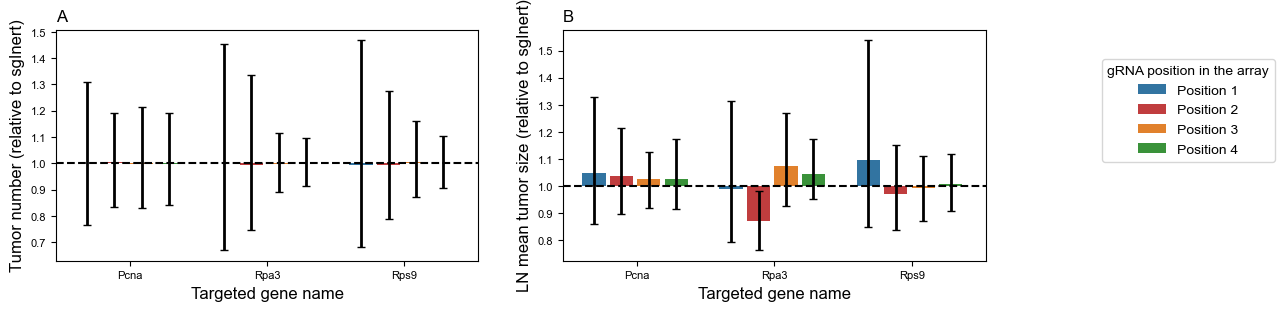

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configuration parameters
# Set figure size
# Panel 1 setup
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Flatten the 1x2 array of axes to easily iterate or assign
ax1, ax2 =  axes.ravel()

# Panel 1
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax1,
    ci=None,
    bottom=1,
    dodge=True,  # Ensures bars are grouped but spaced
    palette=custom_palette
)

# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax1.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Tumor number (relative to sgInert)')
ax1.set_xlabel('Targeted gene name')
ax1.legend(title='gRNA position in the array').set_visible(False)
customize_plot(ax1, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='A', 
                   panel_title_size=12,
                   xaxis_title=None)
# Panel 2
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
test_df = output_df.copy()
x_axis_p = 'Focal_gene'
hue_p = 'focal_gene_position'
test_df = test_df.sort_values(by=[hue_p, x_axis_p], ascending=[True, True]).copy() # it is critical to sort targeted_gene_name first and genotype later because here the x aixs is mouse genotyp while hue is targeted_gen_name
input_df = test_df
# Plotting barplot using seaborn


barplot = sns.barplot(
    data=input_df,
    x=x_axis_p,
    y=input_df[bt_trait] - 1,
    hue=hue_p,
    ax=ax2,
    ci=None,
    bottom=1,
    palette=custom_palette
)
# Reduce the width of bars to increase space
for bar in barplot.patches:
    bar.set_width(0.17)  # Adjust this value to increase or decrease spacing

# Adding error bars
for patch, temp in zip(barplot.patches,input_df.groupby([hue_p,x_axis_p])):
    # Get the x position of the bar
    x = patch.get_x() + patch.get_width() / 2
    df_row = temp[1]
    # Get the mean and error values
    mean_val = df_row[bt_trait].values[0]
    low_error = mean_val - df_row[trait_of_interest+'_2.5P'].values[0]
    high_error = df_row[trait_of_interest+'_97.5P'].values[0] - mean_val

    # Plot the error bars
    ax2.errorbar(x, mean_val, yerr=[[low_error], [high_error]], fmt='none', c='black', lw=2, capsize=3)

# Add horizontal line at y=1
# ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('LN mean tumor size (relative to sgInert)')
ax2.set_xlabel('Targeted gene name')
ax2.legend(title='gRNA position in the array',ncol=1, loc='center right', bbox_to_anchor=(1.7, 0.65))
customize_plot(ax2, xaxis_title_size=12, 
               xaxis_tick_label_size=8, 
                   yaxis_title_size=12, 
                   yaxis_tick_label_size=8, 
                   panel_title='B', 
                   panel_title_size=12,
                   xaxis_title=None)
ax2.axhline(y=1, color='black', linestyle='--')
# Show plot
plt.show()
# fig.savefig(temp_fig1)

## 9 Inert

<font size="10" color="red"> Fig. 6(h) and (i)</font>

In [92]:
query_df = data_df3

In [94]:
data_df3

,gene_combination,TTN,LN_mean_relative,LN_mean_relative_bootstrap_median,LN_mean_relative_bootstrap_mean,LN_mean_relative_97.5P,LN_mean_relative_2.5P,LN_mean_relative_pvalue_twoside,LN_mean_relative_pvalue_twoside_FDR,95_percentile_relative,95_percentile_relative_bootstrap_median,95_percentile_relative_bootstrap_mean,95_percentile_relative_97.5P,95_percentile_relative_2.5P,95_percentile_relative_pvalue_twoside,95_percentile_relative_pvalue_twoside_FDR,TTN_normalized_relative,TTN_normalized_relative_bootstrap_median,TTN_normalized_relative_bootstrap_mean,TTN_normalized_relative_97.5P,TTN_normalized_relative_2.5P,TTN_normalized_relative_pvalue_twoside,TTN_normalized_relative_pvalue_twoside_FDR
0,NT_NT_NT_NT,1221.0,1.088016,1.104377,1.089261,1.362105,0.946010,0.366,0.610,1.140602,1.143054,1.123761,1.416279,0.971934,0.252,0.6000,0.943271,0.949236,0.961227,1.114734,0.766923,0.352,0.586667
1,NT_NT_NT_Safe,22872.0,0.970095,0.979831,0.988223,1.015716,0.915247,0.160,0.610,1.000000,0.988080,1.000000,1.068654,0.892590,0.360,0.6000,1.000659,1.006227,1.000000,1.106802,0.920689,0.710,0.862000
2,NT_NT_Safe_Safe,3655.0,0.961164,0.974071,0.981554,1.046597,0.886846,0.310,0.610,0.983682,0.963740,0.977912,1.075362,0.833686,0.316,0.6000,1.081088,1.096800,1.083845,1.284644,0.984968,0.274,0.586667
3,NT_Safe_Safe_Safe,2129.0,1.014429,1.024478,1.007731,1.151034,0.940838,0.892,0.892,1.019300,1.035253,1.000294,1.252564,0.880310,0.998,0.9980,1.000000,1.009486,1.000000,1.213158,0.835770,0.862,0.862000
4,Safe_Safe_Safe_Safe,2345.0,1.000000,1.007936,1.000000,1.123582,0.920674,0.788,0.892,0.963631,0.973963,0.977172,1.180794,0.806564,0.562,0.7025,0.946268,0.960416,0.968343,1.101991,0.827008,0.350,0.586667


In [96]:
x_axis_p = 'gene_combination'
# KTC df, KT df and the trait I am focusing on
test_df = query_df
logy = False
xlabel_fontsize = 10
rotation_angle = 0

test_df = test_df.sort_values(by = [x_axis_p],ascending=[True]).copy()
# Define a color palette based on x_axis_p
unique_x_values = test_df[x_axis_p].unique()  # Get unique x values
colors = sns.color_palette("tab20", len(unique_x_values))  # Generate a palette
color_mapping = dict(zip(unique_x_values, colors))  # Map x values to colors

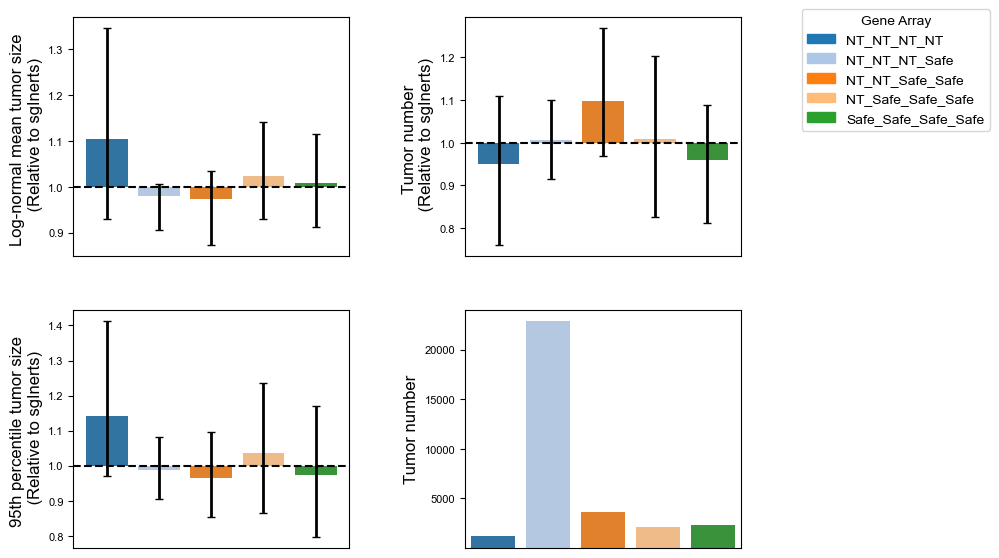

In [98]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches  # For creating custom legend handles
# Panel 1 setup
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten the 2x2 array of axes to easily iterate or assign
ax1, ax2, ax3, ax4 = axes.ravel()

# Panel 1
input_df = test_df
trait_of_interest = 'LN_mean_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax1, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax1.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax1.axhline(y=1, color='black', linestyle='--')

# Set labels
ax1.set_ylabel('Log-normal mean tumor size \n (Relative to sgInerts)')
ax1.set_xlabel('Unordered gene array')

ax1.tick_params(axis='x', labelrotation=rotation_angle)


if xlabel_fontsize:
    ax1.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)

# Panel 2
input_df = test_df
trait_of_interest = 'TTN_normalized_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax2, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax2.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax2.axhline(y=1, color='black', linestyle='--')

# Set labels
ax2.set_ylabel('Tumor number \n (Relative to sgInerts)')
ax2.set_xlabel('Unordered gene array')

ax2.tick_params(axis='x', labelrotation=rotation_angle)

if xlabel_fontsize:
    ax2.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)
    
# Panel 3
input_df = test_df
trait_of_interest = '95_percentile_relative'
bt_trait = f'{trait_of_interest}_bootstrap_median'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[bt_trait]-1,  ax=ax3, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])
# Add error bars
ax3.errorbar(
    data=input_df,
    x=x_axis_p, 
    y= trait_of_interest, 
    yerr=[input_df[bt_trait] - input_df[trait_of_interest+'_2.5P'], 
          input_df[trait_of_interest+'_97.5P'] - input_df[bt_trait]],
    fmt='none', c='black', lw=2, capsize=3)

# Set the y-axis to log scale if needed
ax3.axhline(y=1, color='black', linestyle='--')

# Set labels
ax3.set_ylabel('95th percentile tumor size \n (Relative to sgInerts)')
ax3.set_xlabel('Unordered gene array')

ax3.tick_params(axis='x', labelrotation=rotation_angle)



if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)    
    
# Panel 4
input_df = test_df
trait_of_interest = 'TTN'
# Plotting barplot using seaborn
barplot = sns.barplot(data=input_df, x=x_axis_p, y=input_df[trait_of_interest]-1,  ax=ax4, bottom=1, palette=[color_mapping[val] for val in input_df[x_axis_p]])

# Set labels
ax4.set_ylabel('Tumor number')
ax4.set_xlabel('Unordered gene array')

ax4.tick_params(axis='x', labelrotation=rotation_angle)    
if xlabel_fontsize:
    ax4.tick_params(axis='x', which='major', labelsize=xlabel_fontsize)        
plt.tight_layout()  # Adjust layout to prevent overlap

for temp in [ax1, ax2, ax3, ax4]:
    temp.set_xticks([])  # Remove ticks
    temp.set_xlabel('')  # Remove label
    customize_plot(temp, xaxis_title_size=12, 
                   xaxis_tick_label_size=4, 
                       yaxis_title_size=12, 
                       yaxis_tick_label_size=8, 
                       panel_title='', 
                       panel_title_size=12,
                       xaxis_title=None)

if logy == True:
    ax1.set_yscale('log', base=2)
    temp_ticks_list = ax1.get_yticks()
    ax1.set_yticklabels(temp_ticks_list)
    ax3.set_yscale('log', base=2)
    temp_ticks_list = ax3.get_yticks()
    ax3.set_yticklabels(temp_ticks_list)
# Create a legend
handles = [mpatches.Patch(color=color, label=label) for label, color in color_mapping.items()]
fig.legend(handles=handles, title="Gene Array", loc="upper right", bbox_to_anchor=(1.25, 1))
# Save figure if needed
# fig.savefig(temp_fig1)

# Display the plot
plt.show()
